# Preparation #
Load the necessary packages. This includes numpy, pandas, and matplotlib. Scikit-learn is also needed but will be called later when used.
This tutorial follows the text book: Müller&Guido: "Introduction to Machine Learning with Python" (O'Reilly, 2016)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Meet the data #
The data that we will use in the first example is from the Iris dataset, a classical dataset in ML and statistics. It is included in the scikit-learn package and can therefore be easily downloaded with the following command.

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object is a Bunch object, similar to a dictionary. It contains keys and values. Here we print the keys. And below the first 193 rows of the value of the key DESCR, which gives a short description of the dataset.

In [3]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


The values of the keys target_names and feature_names are arrays of strings, containing the species of the flowers that we want to predict, and a description of the features, from which we want to predict the species.

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data array contains the numeric measurements of the flowers. Rows correspond to flowers and the columns to the four measurements that were taken for every flower. We have 4 measurements for each flower ("features") and in total 150 measurements ("samples"), so we should end up with a 150x4 matrix.

In [7]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [8]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


The target array contains the species for each of the flowers, it is a 150 dimensional vector. The species are encoded as integers from 0 to 2, where the meanings are given by the iris['target_names'] array.

In [9]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [10]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Training and Testing Data #
Since we want to create a generalized model for new, unknown data, we cannot test the model with the same data set with which we fitted the data. Therefore, we split into training and test datasets. Scikit learn has a function included, by default the split is 75% training and 25% test dataset. Random shuffling is important when data is sorted (like here).

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [12]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


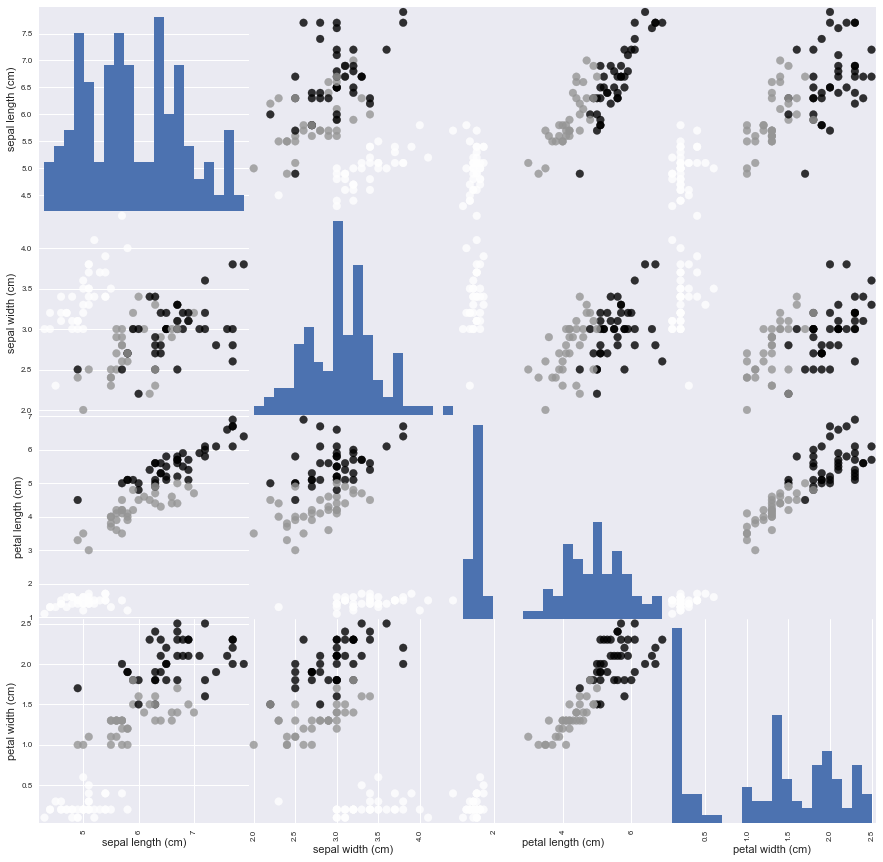

In [36]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
from pandas import scatter_matrix
scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

# Building a k-Nearest Neighbour Model #
The k-Nearest Neighbour Model is implemented in scikit-learn and can be implemented in only a few lines. It is a class that we call in the following lines. Here, the number k of neighbours can be adjusted. Also, other parameters, like the used metric. Here, we use Euclidean p=2 metric.
The fit is called in the next line.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Using the test dataset, we can verify the model. This means, we test the performance of the model using a dataset that we know the right classification of, but has not been used to fit the model!

In [43]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [44]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97


We can now use the fit to make a prediction for newly measured data.

In [42]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Using sklearn, the whole procedure can be written in three lines:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Now we can also do other test, like: How does the performance depend on the number k of neighbours to include

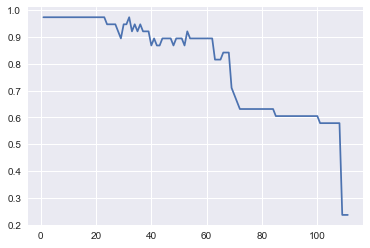

In [47]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

score = []
for n in np.arange(1,112):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    score.append(knn.score(X_test, y_test))

plt.plot(np.arange(1,112),score)
plt.show()

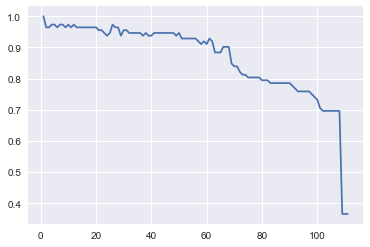

In [51]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

score = []
for n in np.arange(1,112):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    score.append(knn.score(X_train, y_train))

plt.plot(np.arange(1,112),score)
plt.show()